# <center><b>Analysis on US Car Accident Dataset<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
 - **8.1** [**Top 10 Cities Of US Having Maximum Accident.**](#Section81)
  - **8.2** [**Density of High Accident city and low accident city?**](#Section82)
  - **8.3** [**At what time during the day accidents are more?**](#Section83)
  - **8.4** [**How do different environmental factors affect the car accidents differently?**](#Section84)
  - **8.5** [**What time during the season/month are accidents highest?**](#Section85)
  - **8.6** [**Which time zone has highest no of accidents?**](#Section86)
  - **8.7** [**What is the yearly trend of accidents occuring?**](#Section87)
  - **8.8** [**Sevierty Of accidents with respect to the weather condition ?**](#Section88)
  - **8.9** [**Frequency of accident with respect to street,airportcode,zipcode,city,country,state?**](#Section89)
  - **8.10** [**Accidents hotspot streets according to latitude and logitude By taking 20% of the actual dataframe**](#Section810)
  - **8.11** [**Accidents Sevierity with respect to various enironmental factors?**](#Section811)
**9.** [**Summary and **Conclusion****](#Section9)<br>
  - **9.1** [**Actionable Insights**](#Section92)

---
<a name = Section1></a>
# **1. Introduction**
---
- The **economic and societal impact** of traffic accidents cost U.S. citizens **hundreds of billions of dollars every year.**
- A large part of **losses** is **caused** by a **small number of serious accidents.**
- This is a countrywide **car accident dataset**, which covers **49 states of the USA**. The accident data are collected from **February 2016 to Dec 2021**

- **Accident analysis** is carried out in order to **determine** the cause or causes of an accident (that can result in single or multiple outcomes).
- The **proactive approach**, one of the two main approaches for dealing with traffic safety problems, focuses on **preventing potential unsafe road** conditions from occurring in the first place.

-  To **prevent** further accidents of a similar kind. It is part of accident investigation or incident investigation.
- If we can **identify the patterns** of how these serious accidents happen and the key factors, we might be able to **implement well-informed actions** and **better allocate financial and human resources**.

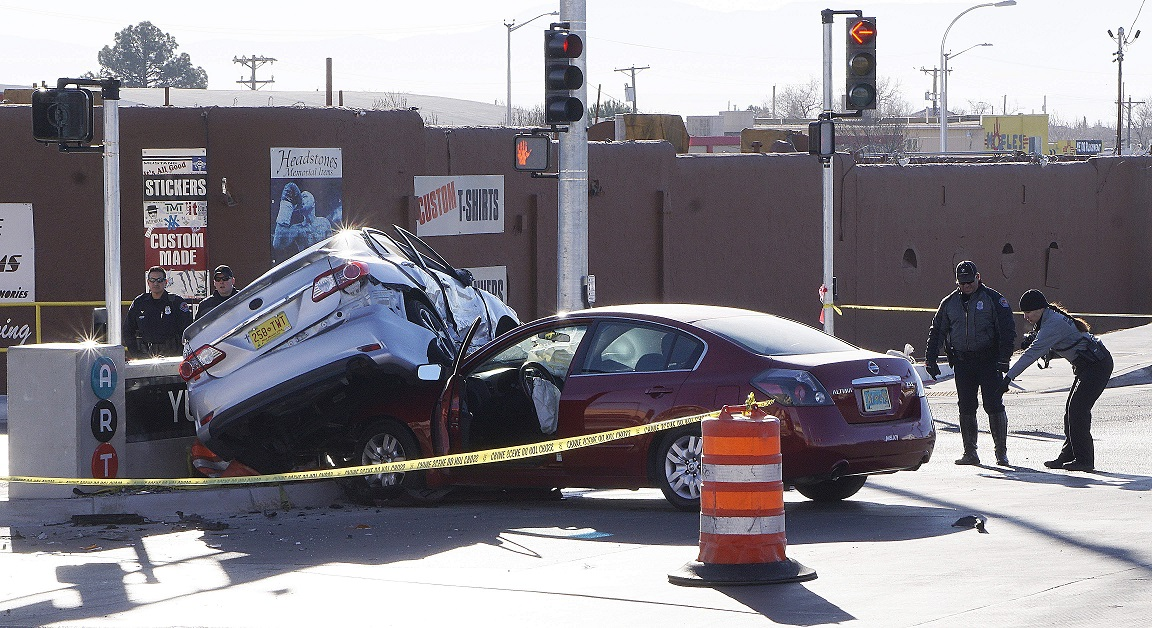

- By **analyzing** the accident data we can prevent accidents by introducing **new speed limits**. 

- Also By **analyzing** we can **recommend smart traffic surveliance system** for minimising the risk of accidents due to traffic lighs issue.

- US-Accidents can be used for numerous applications such as **real-time accident prediction**, studying **accident hotspot locations**, casualty analysis and extracting cause and effect rules to **predict accidents**, or studying the **impact of precipitation or other environmental stimuli on accident occurrence**.


---
<a name = Section2></a>
# **2. Problem Statement**
---

- The main purpose of analyzing the data within this dataset, is to first fully understand what is going on. 

- US car accidents; causality analysis; the environmeantla casue behind car accidents; the traffic behavior and accidents during COVID-19.

- How do different environmental factors affect the car accidents differently? Does COVID-19 have any impact on traffic behavior and accidents?

- What is the current trend of yearly car accidents?

- What times are accidents most likely to occur within a day? What about weekly? Yearly?

<center><img width=60% src="https://raw.githubusercontent.com/insaid2018/PGPDSAI/main/03%20Term%203%20-%20EDA%20%26%20Data%20Storytelling/03%20Module%203/img/04%20mental-health.png"></center>



- What time during the season/month are accidents highest?

- What is the percentage of accident occurances during the day? How about during the night?
- What are the actionable Insights we can gather from Dataset.



---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                                           
!pip install opendatasets

In [2]:
!pip install pandas-profiling==3.2.0
!pip install visions==0.7.4
!pip install markupsafe==2.0.1 

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [3]:
!pip install -q --upgrade yellowbrick
!pip install opendatasets --upgrade --quiet            

<a name = Section33></a>
### **3.3 Importing Libraries**

In [4]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
from collections import Counter                                     # For counting hashable objects
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
import numpy as np                                                  # Importing numpy Library for easy mathematical Calculations
%matplotlib inline
import opendatasets as od
from pandas_profiling import ProfileReport
import plotly.graph_objs as go                                      # For Plotly interfaced graphs
import calendar                                                     # For COnverting Months digits to name
import folium
from folium.plugins import HeatMap
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This dataset is obtained from a survey in 2014.

- It describes the attitudes towards mental health and frequency of mental health disorders in the tech workplace.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 2845342  | 47 | 773.4+ MB| 


| Id | Features | Description |
| :-- | :--| :--| 
|01|**ID**|This is a unique identifier of the accident record.|
|02|**Severity**|Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).| 
|03|**Start_Time**|Shows start time of the accident in local time zone.|
|04|**End_Time**|Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.|
|05|**Start_Lat**|Shows **latitude** in GPS coordinate of the start point.|
|06|**Start_Lng**|Shows **longitude** in GPS coordinate of the start point.Shows longitude in GPS coordinate of the start point.|
|07|**End_Lat**|Shows **latitude** in GPS coordinate of the end point.|
|08|**End_Lng**|Shows **longitude** in GPS coordinate of the end point.|
|09|**Distance(mi)**|The length of the road extent affected by the accident.|
|10|**Description**|Shows natural language description of the accident.|
|11|**Number**|Shows the street number in address field.|
|12|**Street**|Shows the street name in address field.|
|13|**Side**|Shows the relative side of the street (Right/Left) in address field.|
|14|**City**|Shows the city in address field.|
|15|**County**|Shows the county in address field.|
|16|**State**|Shows the state in address field.|
|17|**Zipcode**|Shows the zipcode in address field.|
|18|**Country**|Shows the country in address field.|
|19|**Timezone**|Shows timezone based on the location of the accident (eastern, central, etc.).|
|20|**Airport_Code**|Denotes an airport-based weather station which is the closest one to location of the accident.|
|21|**Weather_Timestamp**|Shows the time-stamp of weather observation record (in local time).|
|22|**Temperature(F)**|Shows the temperature (in Fahrenheit).|
|23|**Wind_Chill(F)**|Shows the wind chill (in Fahrenheit).|
|24|**Humidity(%)**|Shows the humidity (in percentage).|
|25|**Pressure(in)**|Shows the air pressure (in inches).|
|26|**Visibility(mi)**|Shows visibility (in miles).|
|27|**Wind_Direction**|Shows wind direction.|
|28|**Wind_Speed(mph)**|Shows wind speed (in miles per hour).|
|29|**Precipitation(in)**|Shows precipitation amount in inches, if there is any.|
|30|**Weather_Condition**|Shows the weather condition (rain, snow, thunderstorm, fog, etc.)|
|31|**Amenity**|A POI annotation which indicates presence of amenity in a nearby location.|
|32|**Bump**|A POI annotation which indicates presence of speed bump or hump in a nearby location.|
|33|**Crossing**|A POI annotation which indicates presence of crossing in a nearby location.|
|34|**Give_Way**|A POI annotation which indicates presence of give_way in a nearby location.|
|35|**Junction**|A POI annotation which indicates presence of junction in a nearby location.|
|36|**No_Exit**|A POI annotation which indicates presence of no_exit in a nearby location.|
|37|**Railway**|A POI annotation which indicates presence of railway in a nearby location.	|
|38|**Roundabout**|A POI annotation which indicates presence of roundabout in a nearby location.|
|39|**Station**|A POI annotation which indicates presence of station in a nearby location.|
|40|**Stop**|A POI annotation which indicates presence of stop in a nearby location.|
|41|**Traffic_Calming**|A POI annotation which indicates presence of traffic_calming in a nearby location.|
|42|**Traffic_Signal**|A POI annotation which indicates presence of traffic_signal in a nearby loction.|
|43|**Turning_Loop**|A POI annotation which indicates presence of turning_loop in a nearby location.|
|44|**Sunrise_Sunset**|Shows the period of day (i.e. day or night) based on sunrise/sunset.|
|45|**Civil_Twilight**|Shows the period of day (i.e. day or night) based on civil twilight.|
|46|**Nautical_Twilight**|Shows the period of day (i.e. day or night) based on nautical twilight.|
|47|**Astronomical_Twilight**|Shows the period of day (i.e. day or night) based on astronomical twilight.|


- **Note:** For easy reference I am  sharing a <a href="https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/download">**link**</a> which you can keep handy while analyzing the data.If opendataset don't work .You can Download DataSet from this Link and then use it to run it from local system drive.

In [5]:
#If this dont't Work you can downlaod dataset from link provided above and use dataset and run it from local system drive.
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

Skipping, found downloaded files in ".\us-accidents" (use force=True to force download)


In [6]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

In [7]:
accident_df = pd.read_csv('US_Accidents_Dec21_updated.csv')
print('Data Shape:', accident_df.shape)
accident_df.head()

Data Shape: (2845342, 47)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.23000,Between Sawmill Rd/Exit 20 and OH-315/Olentangy Riv Rd/Exit 22 - Accident.,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.10000,36.10000,58.00000,29.76000,10.00000,SW,10.40000,0.00000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.74700,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90000,NaN,91.00000,29.68000,10.00000,Calm,NaN,0.02000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.05500,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.00000,NaN,97.00000,29.70000,10.00000,Calm,NaN,0.02000,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.12300,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.00000,NaN,55.00000,29.65000,10.00000,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.17239,-84.49279,39.17048,-84.50180,0.50000,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.00000,29.80000,93.00000,29.69000,10.00000,WSW,10.40000,0.01000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
accident_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     2845342 non-null  object 
 1   Severity               2845342 non-null  int64  
 2   Start_Time             2845342 non-null  object 
 3   End_Time               2845342 non-null  object 
 4   Start_Lat              2845342 non-null  float64
 5   Start_Lng              2845342 non-null  float64
 6   End_Lat                2845342 non-null  float64
 7   End_Lng                2845342 non-null  float64
 8   Distance(mi)           2845342 non-null  float64
 9   Description            2845342 non-null  object 
 10  Number                 1101431 non-null  float64
 11  Street                 2845340 non-null  object 
 12  Side                   2845342 non-null  object 
 13  City                   2845205 non-null  object 
 14  County            

In [9]:
accident_df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [10]:
accident_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2845342.00000,2845342.00000,2845342.00000,2845342.00000,2845342.00000,2845342.00000,1101431.00000,2776068.00000,2375699.00000,2772250.00000,2786142.00000,2774796.00000,2687398.00000,2295884.00000
mean,2.13757,36.24520,-97.11463,36.24532,-97.11439,0.70268,8089.40811,61.79356,59.65823,64.36545,29.47234,9.09939,7.39504,0.00702
std,0.47872,5.36380,18.31782,5.36387,18.31763,1.56036,18360.09399,18.62263,21.16097,22.87457,1.04529,2.71755,5.52745,0.09349
min,1.00000,24.56603,-124.54807,24.56601,-124.54575,0.00000,0.00000,-89.00000,-89.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,2.00000,33.44517,-118.03311,33.44628,-118.03333,0.05200,1270.00000,50.00000,46.00000,48.00000,29.31000,10.00000,3.50000,0.00000
50%,2.00000,36.09861,-92.41808,36.09799,-92.41772,0.24400,4007.00000,64.00000,63.00000,67.00000,29.82000,10.00000,7.00000,0.00000
75%,2.00000,40.16024,-80.37243,40.16105,-80.37338,0.76400,9567.00000,76.00000,76.00000,83.00000,30.01000,10.00000,10.00000,0.00000
max,4.00000,49.00058,-67.11317,49.07500,-67.10924,155.18600,9999997.00000,196.00000,196.00000,100.00000,58.90000,140.00000,1087.00000,24.00000


**Observations:**

- We can see the description of only 11 continuous features 

- The **Severity** feature ranges from **1 to 4 units**.

- **1** being **lest impact** on traffic while **4 being most** (When traffic affected is most due to accidents)

- The **midspread** (middle 50%) of the **Severity** feature ranges from **3** to **1 units**.

- The 75% of **Distance** feature ranges from **0.00 mi to 0.9 mi**.

- The **Temperature** feature ranges from **-89F to 129.4F** Which means that min temp is (-67.22°C to 54.111°C) which is in normal range.

- Looking at the maximum value of the **Wind_Speed**, we can see that it may be misinformation as max is (471mph = 758kmph) which is quite abnormal

- **ID** feature is an **identifier** so we won't be making any statistical observations for it. 

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [11]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

**Observations:**

- There are **43 features** with **2,85,806  observations**.(After Selcting severity of only 3-4)

- **Severity** is of **int64** datatype.

- **Start_Time** , **End_Time** and **Weather_Timestamp** are of **datetime64[ns]** datatype.

- **InvoiceDate** is of **datetime64[ns]** datatype.

- All of the Data has **imperial system** As Units 

- We will have to make more sense of Accidents by exploring them further.

<a name = Section5></a>

---
# **5. Data Pre-Profiling**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [12]:
profile = ProfileReport(df = accident_df)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


<a name = Section6></a>

---
# **6. Data Cleaning**
---

- In this section, we will perform the **cleaning** operations over the features using information from the previous section.

- We will simply **drop** the **rows** that contain **missing** values.

- We will also extract **year**, **month**, **hour** and **day of the week** of the Accidents.

- Dropping of **useless** features for our analysis.

- **Cleaning** up of **Categorical features** in Dataset

<a name = Section51></a>
### **6.1 Handling of Missing Data**

- In this section, we will identify missing data and check the proportion of it and take appropriate measures.

In [13]:
null_frame = pd.DataFrame(index = accident_df.columns.values)
null_frame['Null Frequency'] = accident_df.isnull().sum().values
percent = accident_df.isnull().sum().values/accident_df.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1743911.00000,2.00000,0.00000,137.00000,0.00000,0.00000,1319.00000,0.00000,3659.00000,9549.00000,50736.00000,69274.00000,469643.00000,73092.00000,59200.00000,70546.00000,73775.00000,157944.00000,549458.00000,70636.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2867.00000,2867.00000,2867.00000,2867.00000
Missing %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,61.29000,0.00000,0.00000,0.00000,0.00000,0.00000,0.05000,0.00000,0.13000,0.34000,1.78000,2.43000,16.51000,2.57000,2.08000,2.48000,2.59000,5.55000,19.31000,2.48000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.10000,0.10000,0.10000,0.10000


**Observations:**

- We can observe that following features are found to have missing values along with the proportions:

|Feature|Object Type|Missing Proportion|Solution|
|:--:|:--:|:--:|:--|
|Number|float64|69.64%|Drop the feature.|
|Wind_Chill(F)|float64|44.29%|Drop the feature.|
|Precipitation(in)|float64|50.11%|Drop the feature.|
|Wind_Speed(mph)|float64|12.14%|Replace with mode.|
|Temperature(F)|float64|2.41%|Replace with mean.|
|Humidity|float64|2.56%|Replace with mean.|
|Pressure(in)|float64|2.11%|Replace with mode.|
|Visibility(mi)|float64|2.88%|Replace with mode.|
- Features having null value <1% after handling missing data we'll drop those small rows as it won't affect our data much.

In [14]:
accident_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2845342.00000,2845342.00000,2845342.00000,2845342.00000,2845342.00000,2845342.00000,1101431.00000,2776068.00000,2375699.00000,2772250.00000,2786142.00000,2774796.00000,2687398.00000,2295884.00000
mean,2.13757,36.24520,-97.11463,36.24532,-97.11439,0.70268,8089.40811,61.79356,59.65823,64.36545,29.47234,9.09939,7.39504,0.00702
std,0.47872,5.36380,18.31782,5.36387,18.31763,1.56036,18360.09399,18.62263,21.16097,22.87457,1.04529,2.71755,5.52745,0.09349
min,1.00000,24.56603,-124.54807,24.56601,-124.54575,0.00000,0.00000,-89.00000,-89.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,2.00000,33.44517,-118.03311,33.44628,-118.03333,0.05200,1270.00000,50.00000,46.00000,48.00000,29.31000,10.00000,3.50000,0.00000
50%,2.00000,36.09861,-92.41808,36.09799,-92.41772,0.24400,4007.00000,64.00000,63.00000,67.00000,29.82000,10.00000,7.00000,0.00000
75%,2.00000,40.16024,-80.37243,40.16105,-80.37338,0.76400,9567.00000,76.00000,76.00000,83.00000,30.01000,10.00000,10.00000,0.00000
max,4.00000,49.00058,-67.11317,49.07500,-67.10924,155.18600,9999997.00000,196.00000,196.00000,100.00000,58.90000,140.00000,1087.00000,24.00000


**Performing Operations**

In [15]:
accident_df.drop(['Number', 'Wind_Chill(F)','Precipitation(in)'], axis=1, inplace=True)

In [16]:
accident_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.23000,Between Sawmill Rd/Exit 20 and OH-315/Olentangy Riv Rd/Exit 22 - Accident.,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.10000,58.00000,29.76000,10.00000,SW,10.40000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.74700,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90000,91.00000,29.68000,10.00000,Calm,NaN,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.05500,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.00000,97.00000,29.70000,10.00000,Calm,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.12300,At Dart Ave/Exit 21 - Accident.,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.00000,55.00000,29.65000,10.00000,Calm,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.17239,-84.49279,39.17048,-84.50180,0.50000,At Mitchell Ave/Exit 6 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.00000,93.00000,29.69000,10.00000,WSW,10.40000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [17]:
for column in ['Wind_Speed(mph)', 'Pressure(in)', 'Visibility(mi)']:
    accident_df[column].fillna(accident_df[column].mode()[0], inplace=True)

In [18]:
accident_df['Temperature(F)'] = accident_df['Temperature(F)'].fillna((accident_df['Temperature(F)'].mean()))

In [19]:
accident_df['Humidity(%)'] = accident_df['Humidity(%)'].fillna((accident_df['Humidity(%)'].mean()))

In [20]:
null_frame = pd.DataFrame(index = accident_df.columns.values)
null_frame['Null Frequency'] = accident_df.isnull().sum().values
percent = accident_df.isnull().sum().values/accident_df.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,137.00000,0.00000,0.00000,1319.00000,0.00000,3659.00000,9549.00000,50736.00000,0.00000,0.00000,0.00000,0.00000,73775.00000,0.00000,70636.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2867.00000,2867.00000,2867.00000,2867.00000
Missing %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.05000,0.00000,0.13000,0.34000,1.78000,0.00000,0.00000,0.00000,0.00000,2.59000,0.00000,2.48000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.10000,0.10000,0.10000,0.10000


- Now rest of the value has negligiable impact on our data so now we are dropping rest of all the null values. 

In [21]:
accident_df = accident_df.dropna()

In [22]:
accident_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.23000,Between Sawmill Rd/Exit 20 and OH-315/Olentangy Riv Rd/Exit 22 - Accident.,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.10000,58.00000,29.76000,10.00000,SW,10.40000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.74700,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90000,91.00000,29.68000,10.00000,Calm,0.00000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.05500,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.00000,97.00000,29.70000,10.00000,Calm,0.00000,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.12300,At Dart Ave/Exit 21 - Accident.,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.00000,55.00000,29.65000,10.00000,Calm,0.00000,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.17239,-84.49279,39.17048,-84.50180,0.50000,At Mitchell Ave/Exit 6 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.00000,93.00000,29.69000,10.00000,WSW,10.40000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


- Let's verify the integrity of null values again.

In [23]:
null_frame = pd.DataFrame(index = accident_df.columns.values)
null_frame['Null Frequency'] = accident_df.isnull().sum().values
percent = accident_df.isnull().sum().values/accident_df.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


<a name = Section52></a>
### **6.2 Handling of Redundant Data**

- In this section, we will identify redundant data and check the proportion of it and take appropriate measures.

In [24]:
print('Contains Duplicate Rows?', accident_df.duplicated().any())

Contains Duplicate Rows? False


- In our Data we don't have any duplicated rows.

<a name = Section53></a>
### **6.3 Handling of Inconsistent Data**

- In this section, we will **identify inconsistency** in data and and then **take appropriate measures**.

- Previously, we observed that **Timestamp** feature was **incorrectly indentified** as Object, so, we will rectify it.
- Checking unique values for sunrise/sunset.
- extracting **year**, **month**, **hour** and **day of the week** of the Accidents.


In [25]:
accident_df['Start_Time'] = pd.to_datetime(accident_df['Start_Time'])
accident_df['End_Time'] = pd.to_datetime(accident_df['End_Time'])
accident_df['Weather_Timestamp'] = pd.to_datetime(accident_df['Weather_Timestamp'])

In [26]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2754964 entries, 0 to 2845341
Data columns (total 44 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Street                 object        
 11  Side                   object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [27]:
accident_df['Sunrise_Sunset'].value_counts()

Day      1758751
Night     996213
Name: Sunrise_Sunset, dtype: int64

In [28]:
# Extracting Year, Month, Day and Hour for every Start of Accident.
accident_df['year'] = accident_df['Start_Time'].dt.year
accident_df['month'] = accident_df['Start_Time'].dt.month
accident_df['date'] = accident_df['Start_Time'].dt.day
accident_df['hour'] = accident_df['Start_Time'].dt.hour

# We get Monday = 0 to Sunday = 6 when we convert to day of the week.
# We will add +1 to every day of week so we can get Monday = 1 to Sunday = 7
accident_df['day'] = (accident_df['Start_Time'].dt.dayofweek) + 1
accident_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,month,date,hour,day
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.23000,Between Sawmill Rd/Exit 20 and OH-315/Olentangy Riv Rd/Exit 22 - Accident.,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.10000,58.00000,29.76000,10.00000,SW,10.40000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,8,0,1
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.74700,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90000,91.00000,29.68000,10.00000,Calm,0.00000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,8,5,1
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.05500,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.00000,97.00000,29.70000,10.00000,Calm,0.00000,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2,8,6,1
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.12300,At Dart Ave/Exit 21 - Accident.,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.00000,55.00000,29.65000,10.00000,Calm,0.00000,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016,2,8,6,1
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.17239,-84.49279,39.17048,-84.50180,0.50000,At Mitchell Ave/Exit 6 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.00000,93.00000,29.69000,10.00000,WSW,10.40000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2,8,7,1


In [29]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2754964 entries, 0 to 2845341
Data columns (total 49 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Street                 object        
 11  Side                   object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [30]:
accident_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),year,month,date,hour,day
count,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000
mean,2.13669,36.21198,-97.11357,36.21209,-97.11333,0.69755,61.79312,64.40639,29.47575,9.10214,7.18481,2019.98014,7.51578,16.07279,12.77945,3.74410
std,0.47739,5.38602,18.30818,5.38609,18.30799,1.54443,18.55747,22.79951,1.03914,2.71686,5.58470,1.43688,3.64324,8.71608,5.82897,1.86184
min,1.00000,24.56603,-124.54807,24.56601,-124.54575,0.00000,-89.00000,1.00000,0.02000,0.00000,0.00000,2016.00000,1.00000,1.00000,0.00000,1.00000
25%,2.00000,33.39484,-118.03157,33.39583,-118.03166,0.05200,50.00000,48.00000,29.32000,10.00000,3.00000,2020.00000,4.00000,9.00000,8.00000,2.00000
50%,2.00000,36.04002,-92.28547,36.04060,-92.28332,0.24200,63.00000,67.00000,29.82000,10.00000,7.00000,2021.00000,8.00000,16.00000,14.00000,4.00000
75%,2.00000,40.16926,-80.38316,40.16990,-80.38371,0.75900,76.00000,83.00000,30.01000,10.00000,10.00000,2021.00000,11.00000,23.00000,17.00000,5.00000
max,4.00000,49.00058,-67.11317,49.07500,-67.10924,155.18600,196.00000,100.00000,58.90000,140.00000,1087.00000,2021.00000,12.00000,31.00000,23.00000,7.00000


<a name = Section64></a>
### **6.4 Handling of Useless Features**
- Features 'ID' doesn't provide any useful information about accidents themselves. 'TMC', 'Distance(mi)', 'End_Time' (we have start time), 'Duration', 'End_Lat', and 'End_Lng'(we have start location) can be collected only after the accident has already happened and hence cannot be predictors for serious accident prediction. For 'Description', the POI features have already been extracted from it by dataset creators. Let's get rid of these features first.

In [31]:
accident_df = accident_df.drop(['ID','Description','Distance(mi)', 'End_Time', 
              'End_Lat', 'End_Lng'], axis=1)

In [32]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2754964 entries, 0 to 2845341
Data columns (total 43 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Severity               int64         
 1   Start_Time             datetime64[ns]
 2   Start_Lat              float64       
 3   Start_Lng              float64       
 4   Street                 object        
 5   Side                   object        
 6   City                   object        
 7   County                 object        
 8   State                  object        
 9   Zipcode                object        
 10  Country                object        
 11  Timezone               object        
 12  Airport_Code           object        
 13  Weather_Timestamp      datetime64[ns]
 14  Temperature(F)         float64       
 15  Humidity(%)            float64       
 16  Pressure(in)           float64       
 17  Visibility(mi)         float64       
 18  Wind_Direction        

<a name = Section65></a>
### **6.5 Clean Up Categorical Features**
- If we look at categorical features closely, we will find some chaos in 'Wind_Direction' and 'Weather_Condition'. It is necessary to clean them up first.

**Cleaning up Wind Direction**

In [33]:
print("Wind Direction: ", accident_df['Wind_Direction'].unique())

Wind Direction:  ['SW' 'Calm' 'WSW' 'WNW' 'West' 'NNW' 'South' 'W' 'NW' 'North' 'SSE' 'SSW'
 'ESE' 'SE' 'East' 'Variable' 'NNE' 'NE' 'ENE' 'CALM' 'S' 'VAR' 'N' 'E']


In [34]:
accident_df.loc[accident_df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
accident_df.loc[(accident_df['Wind_Direction']=='West')|(accident_df['Wind_Direction']=='WSW')|(accident_df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
accident_df.loc[(accident_df['Wind_Direction']=='South')|(accident_df['Wind_Direction']=='SSW')|(accident_df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
accident_df.loc[(accident_df['Wind_Direction']=='North')|(accident_df['Wind_Direction']=='NNW')|(accident_df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
accident_df.loc[(accident_df['Wind_Direction']=='East')|(accident_df['Wind_Direction']=='ESE')|(accident_df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
accident_df.loc[accident_df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", accident_df['Wind_Direction'].unique())

Wind Direction after simplification:  ['SW' 'CALM' 'W' 'N' 'S' 'NW' 'E' 'SE' 'VAR' 'NE']


In [35]:
accident_df.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,month,date,hour,day
0,3,2016-02-08 00:37:08,40.10891,-83.09286,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.10000,58.00000,29.76000,10.00000,SW,10.40000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,8,0,1
1,2,2016-02-08 05:56:20,39.86542,-84.06280,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90000,91.00000,29.68000,10.00000,CALM,0.00000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,8,5,1
2,2,2016-02-08 06:15:39,39.10266,-84.52468,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.00000,97.00000,29.70000,10.00000,CALM,0.00000,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2,8,6,1
3,2,2016-02-08 06:51:45,41.06213,-81.53784,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.00000,55.00000,29.65000,10.00000,CALM,0.00000,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016,2,8,6,1
4,3,2016-02-08 07:53:43,39.17239,-84.49279,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.00000,93.00000,29.69000,10.00000,W,10.40000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2,8,7,1


**Cleaning up Weather Condition**

In [36]:
rainy_str = {"Light Rain", "Light Freezing Drizzle", "Light Drizzle", "Rain", "Heavy Rain", "Drizzle", "Thunderstorms and Rain", 
            "Mist ", "Rain Showers","Light Rain Showers", "Heavy Drizzle", "Light Freezing Rain","Heavy Thunderstorms and Rain", "Thunderstorm", 
            "Thunder", "Thunder in the Vicinity","msle", "Rain Showers", "N/A Precipitation","T-Storm", "Rain / Windy", 
            "Light Rain with Thunder", "Heavy T-Storm", "Freezing Rain / Windy", "Heavy Rain / Windy", "Heavy T-Storm / Windy", "Showers in the Vicinity",
              "Wintry Mix", "Light Rain / Windy", "Wintry Mix / Windy", "Thunder / Windy", "Haze / Windy", "T-Storm / Windy", 
              "Rain Shower", "Light Rain Shower", "Light Sleet", "Light Drizzle / Windy", "Tornado", "Light Rain Shower / Windy", "Heavy Rain Shower / Windy",
              "Light Rain Shower / Windy", "Light Freezing Rain / Windy", "Freezing Drizzle", "Heavy Freezing Drizzle", "Heavy Freezing Rain",
             "Thunder / Wintry Mix / Windy", "Mist / Windy", "Heavy Rain Shower", "Heavy Rain Showers", "Light Haze", "Heavy Thunderstorms with Small Hail",
              "Light Thunderstorms and Rain","Mist","Drizzle / Windy","Light Sleet / Windy","Thunder / Wintry Mix","Freezing Rain","Sleet","paste","paste"}

cloudy_str = {"Mostly Cloudy", "Cloudy", "Scattered Clouds", 
             "Partly Cloudy","Haze", "Fog", "Smoke", "Light Freezing Fog", "Light Fog", 
             "Shallow Fog", "Cloudy / Windy", "Partly Cloudy / Windy", "Fog / Windy", 
             "Mostly Cloudy / Windy", "Funnel Cloud", "Drizzle and Fog", "queer", 
             "ostensibly male, unsure what that really means", "Smoke / Windy", "Partial Fog","Overcast",
              "Cloudy","Patches of Fog","Patches of Fog / Windy","paste"
              "paste","paste","paste","paste"}           

Snow_str = {"Snow", "Light Snow", "Blowing Snow", "Heavy Snow",  "Snow Grains", "Squalls ", 
              "Light Ice Pellets", "Heavy Thunderstorms and Snow", "Light Snow Showers", "Ice Pellets", "Light Thunderstorms and Snow", "Light Snow with Thunder",
           "Small Hail", "Snow / Windy", "Light Snow and Sleet", "Light Snow with Thunder", "Blowing Snow / Windy", "Snow and Sleet", 
            "Hail", "Blowing Snow Nearby", "Light Snow and Sleet / Windy", "Heavy Sleet", "Sleet"
             "Snow and Sleet / Windy", "Sleet / Windy", "Drifting Snow", "Heavy Blowing Snow", "Low Drifting Snow"
             "Light Blowing Snow", "Heavy Snow with Thunder", "Thunder and Hail / Windy","Squalls","Light Snow Shower","Snow and Thunder / Windy","Squalls / Windy",
            "Sleet","Snow and Sleet / Windy","Thunder and Hail","Snow and Sleet / Windy","Low Drifting Snow","Light Blowing Snow",
            "'Light Snow / Windy","Heavy Ice Pellets","Heavy Snow / Windy","Light Snow / Windy"}

clear_str = {"Clear", "Fair", "Fair / Windy","Clear"}

dust_str = {"Sand / Dust Whirlwinds", "Widespread Dust", "Blowing Dust / Windy", "Blowing Dust",  "Volcanic Ash", "Dust Whirls ", 
              "Sand / Dust Whirlwinds", "Widespread Dust / Windy", "femail", "Sand / Windy' 'Thunder / Wintry Mix", "Sand / Dust Whirlwinds / Windy",
             "Blowing Sand", "Sand / Dust Whirls Nearby","Sand","Dusty","Dust Whirls","Sand / Windy"}

In [37]:
for a in rainy_str:
    accident_df['Weather_Condition'] = accident_df['Weather_Condition'].replace(a, 'Rainy')

In [38]:
for b in cloudy_str:
    accident_df['Weather_Condition'] = accident_df['Weather_Condition'].replace(b, 'Cloudy')

In [39]:
for c in Snow_str:
    accident_df['Weather_Condition'] = accident_df['Weather_Condition'].replace(c, 'Snow')

In [40]:
for d in clear_str:
    accident_df['Weather_Condition'] = accident_df['Weather_Condition'].replace(d, 'Clear')

In [41]:
for e in dust_str:
    accident_df['Weather_Condition'] = accident_df['Weather_Condition'].replace(e, 'Dusty')

In [42]:
print("Weather Condition: ", accident_df['Weather_Condition'].unique())

Weather Condition:  ['Rainy' 'Cloudy' 'Snow' 'Clear' 'Dusty']


- Here we have to Manually specify each string name so that we can use for loop over it and change it to simple terms.
- This will easy our visualisation later on 
- We can also use pandas profiling to check.

<a name = Section7></a>

---
# **7. Data Post Profiling**
---

In [43]:
accident_df.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,month,date,hour,day
0,3,2016-02-08 00:37:08,40.10891,-83.09286,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.10000,58.00000,29.76000,10.00000,SW,10.40000,Rainy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,8,0,1
1,2,2016-02-08 05:56:20,39.86542,-84.06280,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90000,91.00000,29.68000,10.00000,CALM,0.00000,Rainy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,8,5,1
2,2,2016-02-08 06:15:39,39.10266,-84.52468,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.00000,97.00000,29.70000,10.00000,CALM,0.00000,Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2,8,6,1
3,2,2016-02-08 06:51:45,41.06213,-81.53784,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.00000,55.00000,29.65000,10.00000,CALM,0.00000,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016,2,8,6,1
4,3,2016-02-08 07:53:43,39.17239,-84.49279,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.00000,93.00000,29.69000,10.00000,W,10.40000,Rainy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2,8,7,1


In [44]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2754964 entries, 0 to 2845341
Data columns (total 43 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Severity               int64         
 1   Start_Time             datetime64[ns]
 2   Start_Lat              float64       
 3   Start_Lng              float64       
 4   Street                 object        
 5   Side                   object        
 6   City                   object        
 7   County                 object        
 8   State                  object        
 9   Zipcode                object        
 10  Country                object        
 11  Timezone               object        
 12  Airport_Code           object        
 13  Weather_Timestamp      datetime64[ns]
 14  Temperature(F)         float64       
 15  Humidity(%)            float64       
 16  Pressure(in)           float64       
 17  Visibility(mi)         float64       
 18  Wind_Direction        

In [45]:
accident_df.describe()

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),year,month,date,hour,day
count,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000,2754964.00000
mean,2.13669,36.21198,-97.11357,61.79312,64.40639,29.47575,9.10214,7.18481,2019.98014,7.51578,16.07279,12.77945,3.74410
std,0.47739,5.38602,18.30818,18.55747,22.79951,1.03914,2.71686,5.58470,1.43688,3.64324,8.71608,5.82897,1.86184
min,1.00000,24.56603,-124.54807,-89.00000,1.00000,0.02000,0.00000,0.00000,2016.00000,1.00000,1.00000,0.00000,1.00000
25%,2.00000,33.39484,-118.03157,50.00000,48.00000,29.32000,10.00000,3.00000,2020.00000,4.00000,9.00000,8.00000,2.00000
50%,2.00000,36.04002,-92.28547,63.00000,67.00000,29.82000,10.00000,7.00000,2021.00000,8.00000,16.00000,14.00000,4.00000
75%,2.00000,40.16926,-80.38316,76.00000,83.00000,30.01000,10.00000,10.00000,2021.00000,11.00000,23.00000,17.00000,5.00000
max,4.00000,49.00058,-67.11317,196.00000,100.00000,58.90000,140.00000,1087.00000,2021.00000,12.00000,31.00000,23.00000,7.00000


In [46]:
null_frame = pd.DataFrame(index = accident_df.columns.values)
null_frame['Null Frequency'] = accident_df.isnull().sum().values
percent = accident_df.isnull().sum().values/accident_df.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,month,date,hour,day
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


- The features which were removed are not there in dataset now.
- Nan Values,duplicates all are removed and verified.
- Everything seems to be in order.
- Now We can start Our Exploratory Data Analysis For this Data.

<a name = Section8></a>

---
# **8. Exploratory Data Analysis**
---

<a name = Section81></a>
### **8.1 Top 10 Cities Of US Having Maximum Accident.**

In [47]:
cities_by_accident = accident_df.City.value_counts()

In [48]:
cities_by_accident.head()

Miami          106170
Los Angeles     67517
Orlando         54394
Dallas          41728
Houston         39010
Name: City, dtype: int64

In [49]:
type(cities_by_accident)

pandas.core.series.Series

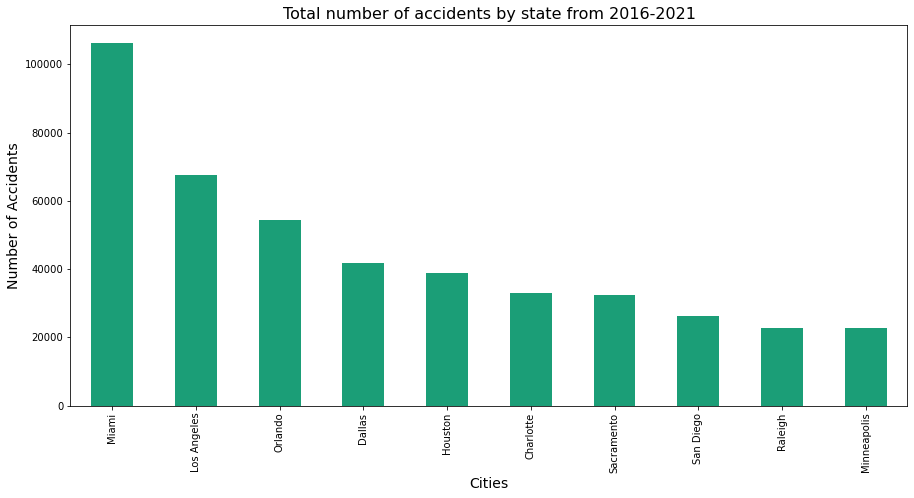

In [50]:
figure = plt.figure(figsize=[15, 7]) #canvas

cities_by_accident[:10].plot.bar(color='#1B9E77')

plt.xlabel(xlabel='Cities', size=14)
plt.ylabel(ylabel='Number of Accidents', size=14)
plt.title(label='Total number of accidents by state from 2016-2021', size=16)

plt.show()

**Observation:**

- We can observe that Even Though New York has maxiumum Polpulation in US its Still Not in Top 10 list.

- Los Angeles Being 2nd most Populated City is in 2nd No in terms of Accidents

**Conclusion:**

- NY CIty has much better traffic system being most populated city and having 6.5k accidents is a good achievement of govt.
- LA needs to improve on its traffic system.
- Miami not being most populated but comes in top refects that smaller citys are having maximum accidents.
- Miami Needs to have some smart traffic Survelence system.


<a name = Section82></a>
### **8.2 Density of High Accident city and low accident city?**

In [51]:
cities = accident_df.City.unique()
len(cities)

10931

In [52]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 100]

In [53]:
len(high_accident_cities)

472

In [54]:
len(low_accident_cities)

8064

In [55]:
all_other = len(cities) - ((len(high_accident_cities))+ len(low_accident_cities))
print(all_other)

2395


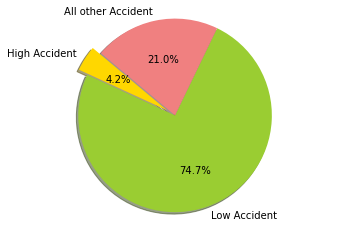

In [56]:

labels = 'High Accident', 'Low Accident' , 'All other Accident'
sizes = [496, 8727,2459]
colors = ['gold', 'yellowgreen','lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

**observation**
- From this we can say that even 496 Cities have >1000 accidents but its ony 5.4% of total whereas cities have <100 (8727 Cities) Accidents might seems like less accidents but they comprises of 74.7% of total accidents that happen in USA
- We should focus on high accident cities but also we have to think about the road saftey of other small accident cities
- Also we got to know by the data that cities have accidents between >100 to <1000 are 21% (2459 Cities) of total accidents.

**conclusion**
- Solving bigger accident prone cities should be are atmost priority but we can't Neglect smaller Cities Also.
- Like we have seen abve even though Miami is not densely poulated but it still shows-up in top.

<a name = Section83></a>
### **8.3 At what time during the day accidents are more?**

In [57]:
accident_df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

<AxesSubplot:xlabel='Start_Time'>

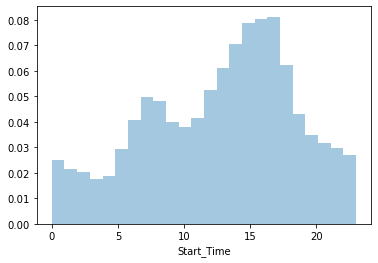

In [58]:
sns.distplot(accident_df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)
#we use normhist to covery Y axis into %.

**observation**
- On the plot we see that most accidents occur during the day, which makes sense, the flow of traffic is higher during the day than at night.
- A High Percentage of accidents occuring between 7AM -10AM (most people maybe trying to get to work, there will be a relatively higher density of cars on the street during this time, increasing the chances of accidents.)
- Next high percentage of accident are in the time from 3PM - 6PM (most people returning from work, there will be a relatively higher density of cars on the street during this time, increasing the chances of accidents.)
- so to check Our hypothes is that: "Is the distribution of accident per hour is same as that of weekdays or not".

<AxesSubplot:xlabel='Start_Time'>

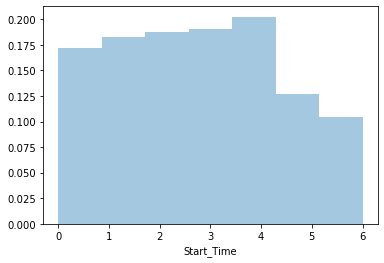

In [59]:
sns.distplot(accident_df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)
#Moday=0 and Sunday=6.

**Conclusion**
- We can conculte that on weekends accidents are less may be our assumption is correct that due to hurry in geeting to work leds to majority of the accidents.
- Also the time of accidents are different in weekends as compared to weekdays , So we can say that majority of accidents are during rush hours.

<a name = Section84></a>
### **8.4 How do different environmental factors affect the car accidents differently?**

In [60]:
weather_of_accident = accident_df.Weather_Condition.value_counts()
weather_of_accident

Clear     1284847
Cloudy    1190863
Rainy      225618
Snow        53251
Dusty         385
Name: Weather_Condition, dtype: int64

In [61]:
weather_of_accident.count()

5

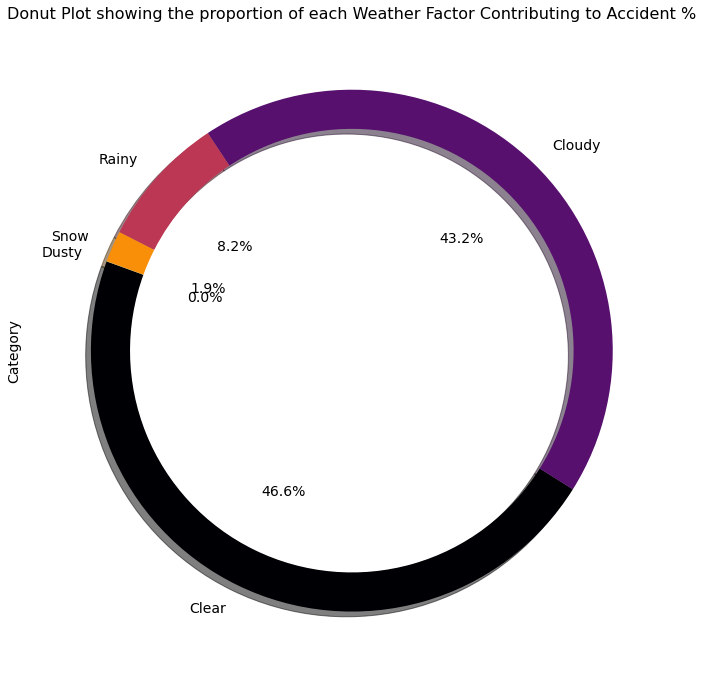

In [62]:
# Creating a custom figure size of 15 X 12 inches
figure = plt.figure(figsize=[15, 12])

weather_of_accident.plot(kind='pie',explode= None,  fontsize=14, 
                                       autopct='%3.1f%%',  wedgeprops=dict(width=0.15),
                                       shadow=True, startangle=160,cmap='inferno')

plt.ylabel(ylabel='Category', size=14)
plt.title(label='Donut Plot showing the proportion of each Weather Factor Contributing to Accident %', size=16)
plt.show()

**Observations**
- **46.6%** of Accidents are in **Clear Weather**** Conditions while **43.2%** due to **cloudy** weather Conditions **[MostlyCloudy + cloudy + partially cloudy ]**.
- Major accidets are due to these 2 Weather Conditions.

**Conclusions**
- In Clear condition accidents are largest implies that there some issue with the traffic system of city.
- Or there may be not appropriate speed limits.
- Smart survelience system should be used and also there should be automated change in limits if weather condition changes to cloudy as visibility hampers due to cloudy weather it should be decreased by 10-15mph from regular speed limits on highways.

<a name = Section85></a>
### **8.5 What time during the season/month are accidents highest?**

**The meteorological seasons in the Southern Hemisphere are also opposite to those in the Northern Hemisphere:**

- spring starts September 1 and ends November 30;
- summer starts December 1 and ends February 28 (February 29 in a Leap Year);
- fall (autumn) starts March 1 and ends May 31
- winter starts June 1 and ends August 31

In [63]:
accident_df['Month_Name'] = accident_df['month'].apply(lambda x: calendar.month_abbr[x])

In [64]:
Season_of_accident = accident_df.Month_Name.value_counts()
Season_of_accident

Dec    460560
Nov    347606
Oct    290249
Sep    233146
Jun    218756
Jan    191462
Feb    188991
May    176633
Aug    172917
Apr    167327
Jul    153693
Mar    153624
Name: Month_Name, dtype: int64

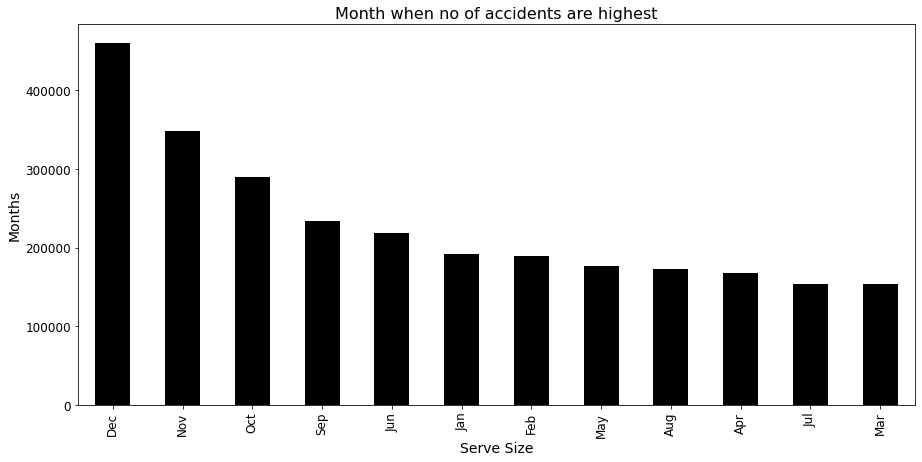

In [65]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of pandas kde() function
Season_of_accident.plot.bar(color='black')

# Changing x-ticks ranging from -200 to 800 with step size of 50 and label size of 12
plt.xticks(ticks= None, size=12)

# Changing y-ticks labels size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Serve Size', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Months', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='Month when no of accidents are highest', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

**Observation**
- Most Of accident happen from Oct-dec ,i.e During spring and starting of summer
- A period of days or weeks in which two or more annual observances occur, especially in the United States, where it most often refers to the approximately 5–6 weeks from Hallowen in October to New Year’s Eve in December.
- Also lots of tourist are there to spend their christmas and New Year even In US.

**Conclusion**
- It is common that during the festive and holiday season there will be more traffic So there should be proper guidance and more patroling of traffic police So as to maintain the speed limits.
- Also there should be more strictness on people who are not following the traffic rules.

<a name = Section86></a>
### **8.6 Which time zone has highest no of accidents?**

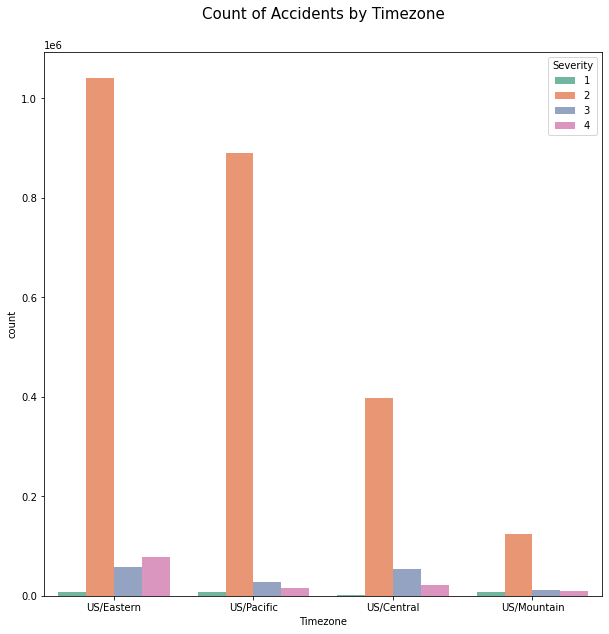

In [66]:
plt.figure(figsize=(10,10))
chart = sns.countplot(x='Timezone', hue='Severity', data=accident_df ,palette="Set2")
plt.title("Count of Accidents by Timezone", size=15, y=1.05)
plt.show()

**Observation and Conslusion**
- Easteren time zone and pacific time zone are having maximum no of accidents of seviery 2.
- Thats why while analysing accidents on top 10 states miami,orlando comes in top 10 
- while pacific time zone also is major contributer in accidets 
- that's why LA is showing in top 10 also

**The degree of severity represents the type of accident. It usually is listed as:**

- Not visible but complaints of pain (least affects traffic).
- Non-incapicating / Minor injuries
- Incapacitating / Major injuries
- Fatal (affects traffic the most).

- Incapicating usually means that you are given help when the accident occurs, through means of an ambulance, police, and firefighters.

<a name = Section87></a>
### **8.7  What is the yearly trend of accidents occuring?

In [67]:
yearly = accident_df.year.value_counts().reset_index().rename(columns={"index": "Year"})
yearly

,Year,year
0,2021,1466015
1,2020,602584
2,2019,249636
3,2017,159428
4,2018,158191
5,2016,119110


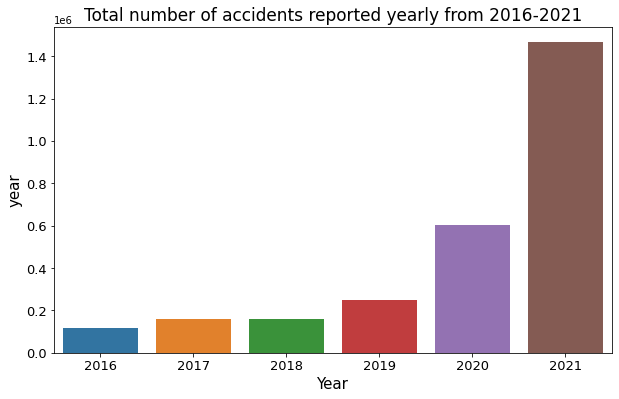

In [68]:
plt.figure(figsize=(10,6))
plt.title('Total number of accidents reported yearly from 2016-2021',size=17, color='black')
plt.xlabel('Year', fontsize=15, color='black')
plt.ylabel("No of Accident per Million", fontsize=15, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

t = sns.barplot(x=yearly.Year, y = yearly.year)
plt.show()

**Accidents have peaked ever since the emergence of COVID, and has continued to increase exponentially.**

- Reasons for this could mainly be due to the disappearance of vehicles on the road and police patrol, therefore which incentivizes people to travel at greater speeds due to no traffic being present. 
- This makes total sense as to why traffic wasn't affected, because there was no traffic to begin with! 
- This was a time people were mainly working from home, virtually attending classes, or simply just prefering to stay indoors. 
- A lot of businesses, sporting events, restaurants, were not operating as well so nobody travelled anywhere.

- However, it is surprising to see such a surge.

<a name = Section88></a>
### **8.8 Sevierty Of accidents with respect to the weather condition ?**

- Now, we will take the severity of the accidents and see how the weather conditions affect it.

- Specifically we will see the distribution of each severity with the weather conditions.

In [69]:
accident_df.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,month,date,hour,day,Month_Name
0,3,2016-02-08 00:37:08,40.10891,-83.09286,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.10000,58.00000,29.76000,10.00000,SW,10.40000,Rainy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,8,0,1,Feb
1,2,2016-02-08 05:56:20,39.86542,-84.06280,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90000,91.00000,29.68000,10.00000,CALM,0.00000,Rainy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,8,5,1,Feb
2,2,2016-02-08 06:15:39,39.10266,-84.52468,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.00000,97.00000,29.70000,10.00000,CALM,0.00000,Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2,8,6,1,Feb
3,2,2016-02-08 06:51:45,41.06213,-81.53784,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.00000,55.00000,29.65000,10.00000,CALM,0.00000,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016,2,8,6,1,Feb
4,3,2016-02-08 07:53:43,39.17239,-84.49279,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.00000,93.00000,29.69000,10.00000,W,10.40000,Rainy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2,8,7,1,Feb


In [70]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2754964 entries, 0 to 2845341
Data columns (total 44 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Severity               int64         
 1   Start_Time             datetime64[ns]
 2   Start_Lat              float64       
 3   Start_Lng              float64       
 4   Street                 object        
 5   Side                   object        
 6   City                   object        
 7   County                 object        
 8   State                  object        
 9   Zipcode                object        
 10  Country                object        
 11  Timezone               object        
 12  Airport_Code           object        
 13  Weather_Timestamp      datetime64[ns]
 14  Temperature(F)         float64       
 15  Humidity(%)            float64       
 16  Pressure(in)           float64       
 17  Visibility(mi)         float64       
 18  Wind_Direction        

In [71]:
accident_df.groupby(by = 'Weather_Condition')['Severity'].sum()

Weather_Condition
Clear     2716448
Cloudy    2568400
Dusty         801
Rainy      483951
Snow       116895
Name: Severity, dtype: int64

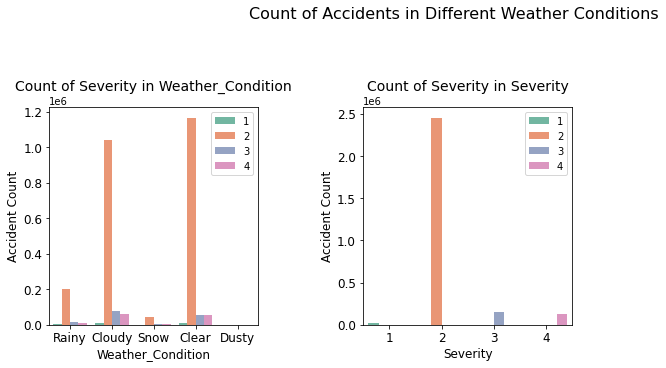

In [72]:
POI_features = ['Weather_Condition','Severity']

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 10))

plt.subplots_adjust(hspace=0.5,wspace = 0.5)
for i, feature in enumerate(POI_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Severity', data=accident_df ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['1', '2', '3', '4'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in {}'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents in Different Weather Conditions',y=1.02, fontsize=16)
plt.show()

- Earlier in question 2 we get to know that there are maximum accidents in Fair and cloudy weather conditions.
- Here we got to know that in fair weather conditions most of the accidents are of sevierty 2. 
- Sevierty 2 accidents are those which are not heavyly nor lightly impacted the traffic.
- In sevierty 2 accidents people mostly get help early and the roads were clear rapidly.
- But the density of sevierty 4 accidents are more then that of fair weather conditions .

<a name = Section89></a>
### **8.9 Frequency of accident with respect to street,airportcode,zipcode,city,country,state?**

- Some location features like 'City' and 'Zipcode' that have too many unique values can be labeled by their frequency.
- Now we are checking the accidents frequency W.r.t Followings Features

- 'Street'
- 'City'
- 'County'
- 'Zipcode'
- 'Airport_Code'

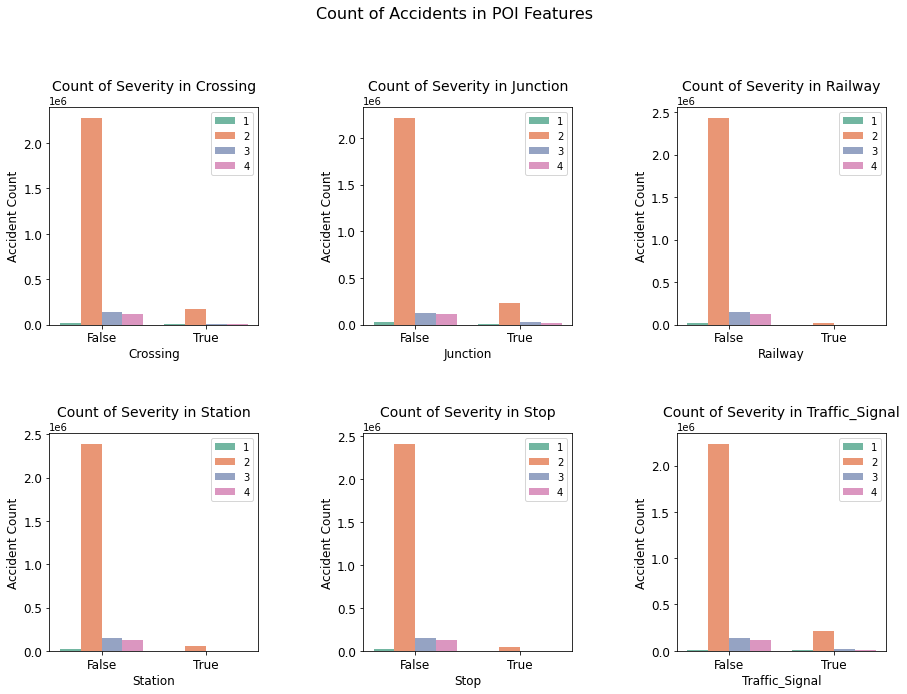

In [73]:
POI_features = ['Crossing','Junction','Railway','Station','Stop','Traffic_Signal']

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

plt.subplots_adjust(hspace=0.5,wspace = 0.5)
for i, feature in enumerate(POI_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Severity', data=accident_df ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['1', '2', '3', '4'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in {}'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents in POI Features',y=1.02, fontsize=16)
plt.show()

**Observation**
- By looking at above graphs it seems accident might happens often because of absence of these features in the area. Like

- "Bump" is necessary to slow the car speed.
- Most places doesn't have traffic signal.

- Accidents near traffic signal and crossing are much less likely to be serious accidents while little more likely to be serious if they are near the junction. Maybe it is because people usually slow down in front of crossing and traffic signal but junction and severity are highly related to speed. Other POI features are so unbalanced that it is hard to tell their relation with severity from plots.

<a name = Section810></a>
### **8.10 Accidents hotspot streets according to latitude and logitude By taking 20% of the actual dataframe?**

In [74]:
lat, lon = accident_df.Start_Lat[0], accident_df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [75]:
for x in accident_df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

2520479   40.63468
1864475   29.56367
2267588   42.76055
1254108   33.99198
2756652   29.67697
2290513   34.05037
949176    25.94594
218839    30.38435
2759670   25.87191
1033690   42.40161
1858891   27.47417
295763    35.18716
447726    27.34388
1680022   28.42814
505980    28.51672
1260758   38.55930
1072822   25.70005
1944339   35.26962
879125    25.89914
2757707   48.23765
2477649   39.05296
2109134   42.02945
1674564   45.03794
460442    35.72075
2822021   36.75935
28388     32.66988
2602660   45.53560
1014694   32.45774
1118313   36.98466
1595552   40.24062
1532623   42.24572
2643768   39.20052
2326011   41.88158
1759033   25.92606
698350    33.39880
2482953   33.37116
2084223   40.71139
1359219   27.58774
2313867   38.17154
2593356   33.83270
1099983   38.69187
2038148   34.07031
1301652   36.77896
1716749   34.16264
2365843   42.41117
1027313   29.60181
2738707   40.85306
1701916   37.58030
810844    39.80998
2556863   41.96350
862973    34.49976
2185268   36.04259
1977403   34

In [76]:
zip(list(accident_df.Start_Lat), list(accident_df.Start_Lng))

In [77]:
sample_df = accident_df.sample(int(0.002 * len(accident_df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [78]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map
#you can use mouse scroller to zoom in or out and can check the hot spot ares in different city/ states.

- As we have latitude nad longitude data so we can easily put these cordinates in map.
- using foilum and puting heatmap over it generates a map which we can use for detecting accidnets hotspots areas.
- Here also its verified that **Eastern** and **Pacific** sides are **hotspots** for accidents.
- Also this will help us Visualise the accidents street wise.
- As we can zoom in and out to get the perticular area/ Street of most accidents prone area.

<a name = Section811></a>
### **8.11 Accidents Severity with respect to various enironmental factors?**
- It looks like one question but it contain lots of information which will be helpful.

**Relationship between Temperature and Severity**

<AxesSubplot:title={'center':'\n Case Reported for Temperature \n'}, xlabel='Temperature(F)', ylabel='\n Number of Accidents \n'>

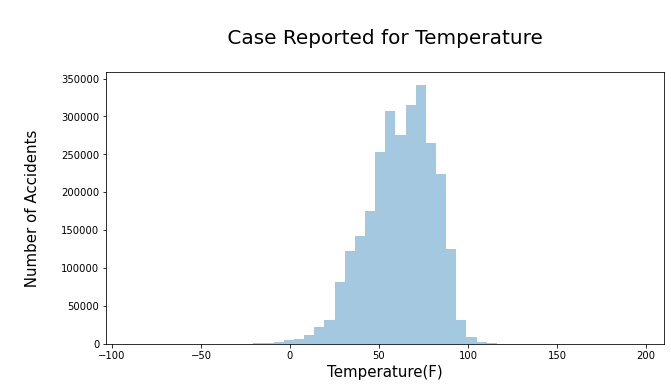

In [79]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Case Reported for Temperature \n', size=20)
plt.ylabel('\n Number of Accidents \n', fontsize=15)
plt.xlabel('\n Temperature(F)\n', fontsize=15)
sns.distplot(a=accident_df["Temperature(F)"],kde=False) 

<AxesSubplot:title={'center':'\n Relationship between Temperature and Severity \n'}, xlabel='Severity', ylabel='Temperature(F)'>

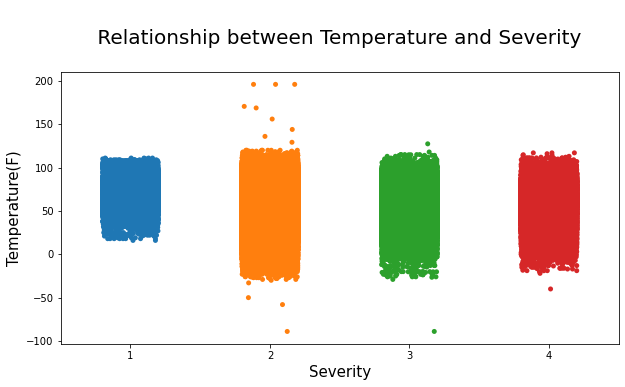

In [80]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Temperature and Severity \n', size=20)
plt.ylabel('\n Temperature(F) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=accident_df['Severity'],y=accident_df['Temperature(F)'],data=accident_df,jitter=0.2)

Text(0.5, 6.79999999999999, '\n Temperature(F) \n')

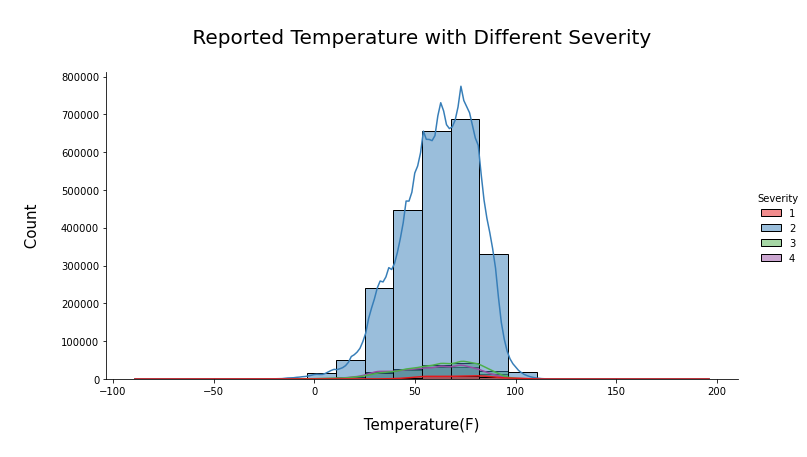

In [81]:
sns.displot(accident_df, x="Temperature(F)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)
plt.title('\n Reported Temperature with Different Severity \n', size=20)
plt.ylabel('\n Count \n', fontsize=15)
plt.xlabel('\n Temperature(F) \n', fontsize=15)

### integrate severity into Temperature(F) distribution. 

**Relationship between Humidity and Severity**

<AxesSubplot:title={'center':'\n Relationship between Humidity and Severity \n'}, xlabel='Severity', ylabel='Humidity(%)'>

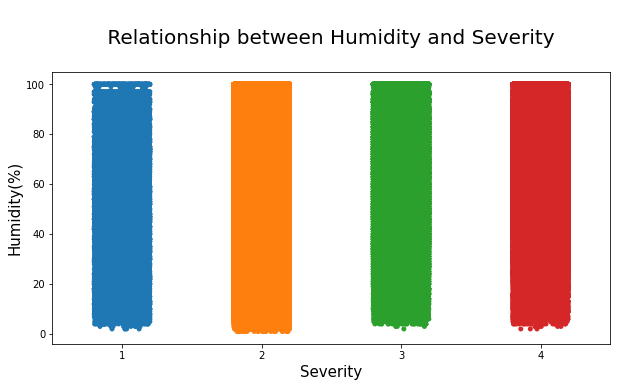

In [82]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Humidity and Severity \n', size=20)
plt.ylabel('\n Humidity(%) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=accident_df['Severity'],y=accident_df['Humidity(%)'],data=accident_df,jitter=0.2)

Text(0.5, 6.79999999999999, '\n Humdity(%) \n')

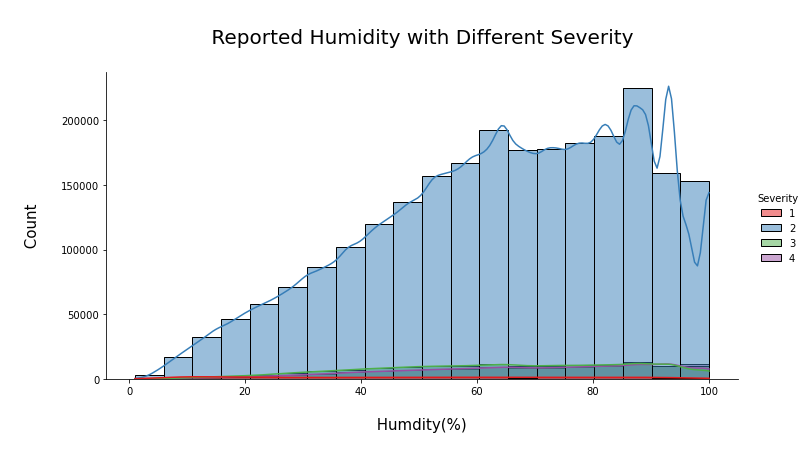

In [83]:
sns.displot(accident_df, x="Humidity(%)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)
plt.title('\n Reported Humidity with Different Severity \n', size=20)
plt.ylabel('\n Count \n', fontsize=15)
plt.xlabel('\n Humdity(%) \n', fontsize=15)

**Relationship between Visibility and Severity**

<AxesSubplot:title={'center':'\n Relationship between Visibility and Severity \n'}, xlabel='Severity', ylabel='Visibility(mi)'>

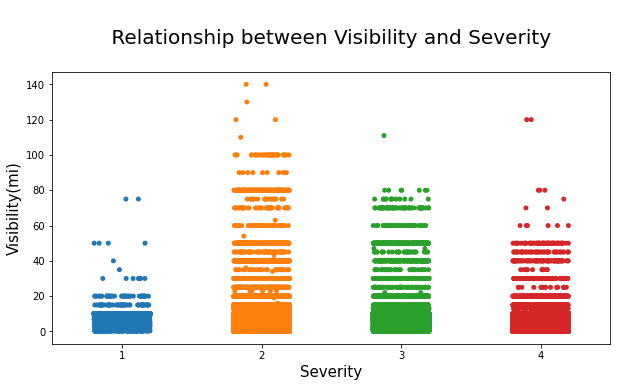

In [84]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Visibility and Severity \n', size=20)
plt.ylabel('\n Visibility(mi) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=accident_df['Severity'],y=accident_df['Visibility(mi)'],data=accident_df,jitter=0.2)

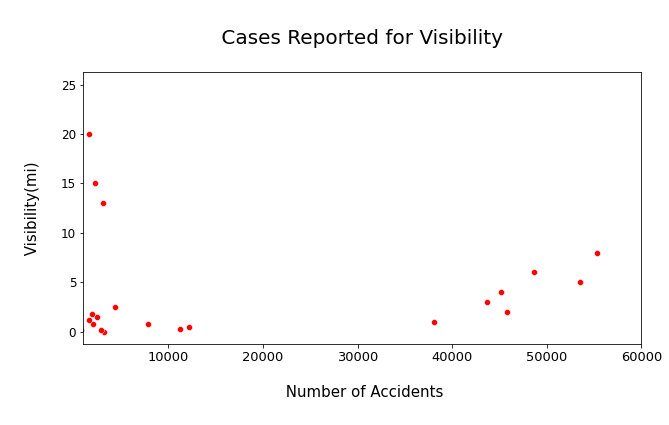

In [85]:
visibility = pd.DataFrame(accident_df["Visibility(mi)"].value_counts()).reset_index().rename(columns={"index":"Visibility","Visibility(mi)":"Cases"})
### recreate a panda data frame
plt.figure(figsize=(10,5))
plt.title('\n Cases Reported for Visibility \n', size=20)
plt.ylabel('\n Visibility(mi) \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(1000,60000)
a = sns.scatterplot(x=visibility.Cases,y=visibility.Visibility[visibility.Visibility<30],color='red')
plt.show()

**Relationship between Windspeed and Severity**

<AxesSubplot:title={'center':'\n Relationship between WindSpeed and Severity \n'}, xlabel='Severity', ylabel='Wind_Speed(mph)'>

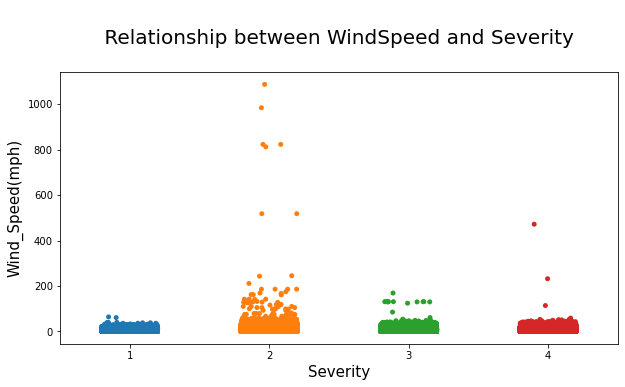

In [86]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between WindSpeed and Severity \n', size=20)
plt.ylabel('\n WindSpeed(mph) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=accident_df['Severity'],y=accident_df['Wind_Speed(mph)'],data=accident_df,jitter=0.2)

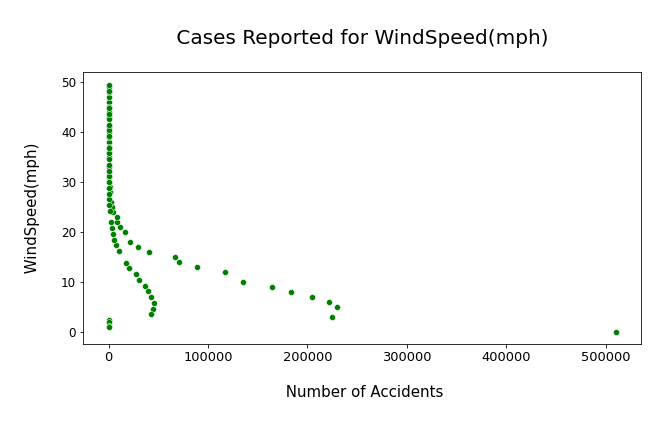

In [87]:
windspeed = pd.DataFrame(accident_df["Wind_Speed(mph)"].value_counts()).reset_index().rename(columns={"index":"Wind_Speed","Wind_Speed(mph)":"Cases"})
plt.figure(figsize=(10,5))
plt.title('\n Cases Reported for WindSpeed(mph) \n', size=20)
plt.ylabel('\n WindSpeed(mph) \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=windspeed.Cases,y=windspeed.Wind_Speed[windspeed.Wind_Speed<50],color='green')
plt.show()

**Brief Summary/Documentation**
- We've just analyzed how different environmental factors might contribute to the number of accidents, how different environmental factors may influence the severity of the accidents.

- I have used pie chart, distplot, stripplot, jointplot, scatterplot, and etc to see the relationship between some environmental factors, severity and number of accidents. More conclusions and findings can be see in the last section.

<a name = Section8></a>

---
# **9. Summary and Conclusion**
---


- Miami is the city with the most number of car accidents.
- The Temperature is almost normally distributed.
- Wind Speed, Visibility, Precipitation all follow a right skewed distribution.
- Humidity on the other hand follows a left skewed distribution.
- There are 127 types of weather condition in the dataset.
- There are 137 data rows that have no city mentioned.
- The severity of a car accident is described by a scale from 1 to 4. where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
- 89% of the car accidents are considered a severity of 2. Only 0.9% of car accidents have a severity score of 1.
- Temperature does not have much of an impact on the severity of the accident. However, extreme weather temperature, like below - -50 F degree, usually only causes accidents that have a severity score of 2.
- Car accidents are most likely to happen at the temperature around 50-80 F degree.
- The number of car accidents increases as the humidity increases. The majority of accidents due to humidty has a severity score of 2.
- Severe car accidents are mostly accompanied with a low visibility (below 50 mi). Meanwhile, The least severe car accidents tend to have the poorest visibility (below 20 mi).
- Precipitation and the number of accidents have a simple inverse relationship. The heavier the rain, the fewer the number of car accidents.
- Precipitation does not affect the severity of the accidents as much as the previous factors. However, during heavy rain(25inch), accidents mostly have a severity score of 2.
- Wind Speed affects the severity of the accidents almost equally.
- 76% of the accidents occur on fairly normal weather conditions (Fair, Mostly Cloudy, Cloudy, Partly Cloudy, Clear).
- 76% of the accident occur during the day
- Only 26% of the accidents occured close to any of the road elements considered.
- Junctions are the road element where occur more accidents with 9.9%
- Severity 2 is the most recurrent with 89% of the accidents.
- Accidents with bad weather doesn't have a higher severity.
- Accidents are not more frequent on bad weather conditions.
- A high percentage of accidents occur between 15 to 18. Probably people’r hurry to get home. The next highest one is around 6 to 8.
- On weekends the number of accidents happened at 0 o’clock is higher than weekdays’.
- Weekday accidents distribution is almost the same as the overall accidents distribution.
- For every year from 2016-2021, the number of reported car accidents increases. 2021 has the most number of car accidents.
- Temperature of accident trends of every year are stable.
- For every year from 2016-2021, humidity trends are stable except during Oct 2019.
- 2017 being the year with the most precipitation has fewer accidents than 2021 being the year with moderate precipitation.
- 2021 still has the most number of accidents at every hour. Nevertheless, this may not reflect the reality because 2021 has - significantly more reported accidents than in 2016 or previous year. Interestingly, the pattern of each year looks almost - identical. Each year's line is just higher than the previous one.
- During covid 19 months, the number of car accidents has increased significantly. Feb 2020 is the start of COVID.
- During covid 19 months, though most jobs become work from home. The number of car accidents happened at every hour has the same pattern as previous years though much higher.
- Cities with the most Covid-19 cases have more car accidents.

<a name = Section92></a>
### **9.1 Actionable Insight**

- There should be functional traffic lights as we have seen in data most of them are not working.
- Majority accidents happen because of not presence of roundabout, bump , crossing etc. 
- Roundabout,Crossing , Speedlimit sings Should be repaired and re-printed with new speed limits in an accident hotspot areas.
- Smaller City need to have smart surveillance system.
- Smart surveillance system help in this as it could recognize where there is more traffic so it could increase the green light time by 15-20 sec more then that of standard limit.
- It could reduce the speed by 10-15mph when the weather forecast it to be cloudy and rainy and in low visibilty conditions.
- Heavy penalty should be imposed on people rushing their cars in city traffic speed limits and also who were using cell phones while driving
- As smaller city seems to have less no of accidents (< 100 accidents) but overall they consist of 74.7% of total accident happen in US. 

- During rush hour there should be enough green lights given to the majority of straight lanes which are connected to majority of offices.
- .
- There should be proper warning system to the people over radio/FM when there is prediction of hevay snow or hailstroms.
- Most of the people drive on all terrain tyres so whever there is chances of snow/hailstrom proper warning should be given over Radio/FM so that people should be aware about it.
- Government should encourage vehicles proving good safety and have scored > (4-5 stars) in Global NCAP/ EuroNCAP.
- Proper Bump/speedbraked should be made as by seeing bump/speedbraker people tends to slow down their vehicle which can also led to less accidents. 
- As in slow speed it is much more likely to avoid accident.
